In [3]:
import pandas as pd
data= pd.read_csv("/content/drive/MyDrive/My Colab/car_price_corrected.csv")
df=data.copy()
df=df.drop(columns="Unnamed: 0")
df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     0          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19235              Yes    Diesel            2.0    51258          4   
19236              Yes    Hybrid            2.4   186923          4   

      Gear box type Drive wheels Doors             Wheel   Color  Airbags  \
0         Automatic          4x4   4-5        Left wheel  Silver       12   
1         Tiptronic          4x4   4-5        Left wheel   Black        8   
2          Variator        Front   4-5  Right-hand drive   Black        2   
3         Automatic          4x4   4-5        Left wheel   White        0   
4         Automatic        Front   4-5        Left wheel  Silver        4   
...             ...          ...   ...               ...     ...      ...   
19232        Manual         Rear   2-3        Left wheel  Silver        5   
19233     Tiptronic        Front   4-5        Left wheel     Red        8   
19234     Automatic        Front   4-5        Left wheel    Grey        4   
19235     Automatic        Front   4-5        Left wheel   Black        4   
19236     Automatic        Front   4-5        Left wheel   White       12   

           Turbo  
0      Non Turbo  
1      Non Turbo  
2      Non Turbo  
3      Non Turbo  
4      Non Turbo  
...          ...  
19232      Turbo  
19233  Non Turbo  
19234  Non Turbo  
19235  Non Turbo  
19236  Non Turbo  

[19237 rows x 18 columns]

In [4]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Turbo               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  int64  
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [6]:
categs=[]
for i in df.columns:
  if df[i].dtypes=="object":
    categs.append(i)

categs

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Turbo']

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [8]:
lab_enc=LabelEncoder()
for i in categs:
  df[i]=lab_enc.fit_transform(df[i])

df

Price  Levy  Manufacturer  Model  Prod. year  Category  \
0      13328  1399            32   1242        2010         4   
1      16621  1018             8    658        2011         4   
2       8467     0            21    684        2006         3   
3       3607   862            16    661        2011         4   
4      11726   446            21    684        2014         3   
...      ...   ...           ...    ...         ...       ...   
19232   8467     0            36    385        1999         1   
19233  15681   831            23   1334        2011         9   
19234  26108   836            23   1442        2010         4   
19235   5331  1288             8    456        2007         4   
19236    470   753            23   1334        2012         9   

       Leather interior  Fuel type  Engine volume  Mileage  Cylinders  \
0                     1          2            3.5   186005          6   
1                     0          5            3.0   192000          6   
2                     0          5            1.3   200000          4   
3                     1          2            2.5   168966          4   
4                     1          5            1.3    91901          4   
...                 ...        ...            ...      ...        ...   
19232                 1          0            2.0   300000          4   
19233                 1          5            2.4   161600          4   
19234                 1          1            2.0   116365          4   
19235                 1          1            2.0    51258          4   
19236                 1          2            2.4   186923          4   

       Gear box type  Drive wheels  Doors  Wheel  Color  Airbags  Turbo  
0                  0             0      1      0     12       12      0  
1                  2             0      1      0      1        8      0  
2                  3             1      1      1      1        2      0  
3                  0             0      1      0     14        0      0  
4                  0             1      1      0     12        4      0  
...              ...           ...    ...    ...    ...      ...    ...  
19232              1             2      0      0     12        5      1  
19233              2             1      1      0     11        8      0  
19234              0             1      1      0      7        4      0  
19235              0             1      1      0      1        4      0  
19236              0             1      1      0     14       12      0  

[19237 rows x 18 columns]

In [10]:
y=df.Price
X=df.drop(columns="Price")
X

Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
0      1399            32   1242        2010         4                 1   
1      1018             8    658        2011         4                 0   
2         0            21    684        2006         3                 0   
3       862            16    661        2011         4                 1   
4       446            21    684        2014         3                 1   
...     ...           ...    ...         ...       ...               ...   
19232     0            36    385        1999         1                 1   
19233   831            23   1334        2011         9                 1   
19234   836            23   1442        2010         4                 1   
19235  1288             8    456        2007         4                 1   
19236   753            23   1334        2012         9                 1   

       Fuel type  Engine volume  Mileage  Cylinders  Gear box type  \
0              2            3.5   186005          6              0   
1              5            3.0   192000          6              2   
2              5            1.3   200000          4              3   
3              2            2.5   168966          4              0   
4              5            1.3    91901          4              0   
...          ...            ...      ...        ...            ...   
19232          0            2.0   300000          4              1   
19233          5            2.4   161600          4              2   
19234          1            2.0   116365          4              0   
19235          1            2.0    51258          4              0   
19236          2            2.4   186923          4              0   

       Drive wheels  Doors  Wheel  Color  Airbags  Turbo  
0                 0      1      0     12       12      0  
1                 0      1      0      1        8      0  
2                 1      1      1      1        2      0  
3                 0      1      0     14        0      0  
4                 1      1      0     12        4      0  
...             ...    ...    ...    ...      ...    ...  
19232             2      0      0     12        5      1  
19233             1      1      0     11        8      0  
19234             1      1      0      7        4      0  
19235             1      1      0      1        4      0  
19236             1      1      0     14       12      0  

[19237 rows x 17 columns]

In [12]:
stdsc=StandardScaler()
X=stdsc.fit_transform(X)
X

array([[ 1.35011797, -0.06082842,  0.92357879, ...,  0.78750868,
         1.25400519, -0.33403563],
       [ 0.67899705, -1.41172317, -0.498032  , ..., -1.26329739,
         0.32809129, -0.33403563],
       [-1.11418169, -0.67998851, -0.43474111, ..., -1.26329739,
        -1.06077956, -0.33403563],
       ...,
       [ 0.3584091 , -0.56741395,  1.4104318 , ..., -0.1446759 ,
        -0.59782261, -0.33403563],
       [ 1.15459455, -1.41172317, -0.98975354, ..., -1.26329739,
        -0.59782261, -0.33403563],
       [ 0.21220691, -0.56741395,  1.14753117, ...,  1.16038251,
         1.25400519, -0.33403563]])

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=0)
X_train,X_val,y_train,y_val=tts(X_train,y_train,test_size=0.1,random_state=0)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [16]:
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation="linear"))
model.add(Dense(32,activation="linear"))
model.add(Dense(1,activation="linear"))

In [17]:
model.compile(optimizer="adam",loss="mae",metrics=["mae"])
result=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,verbose=0)

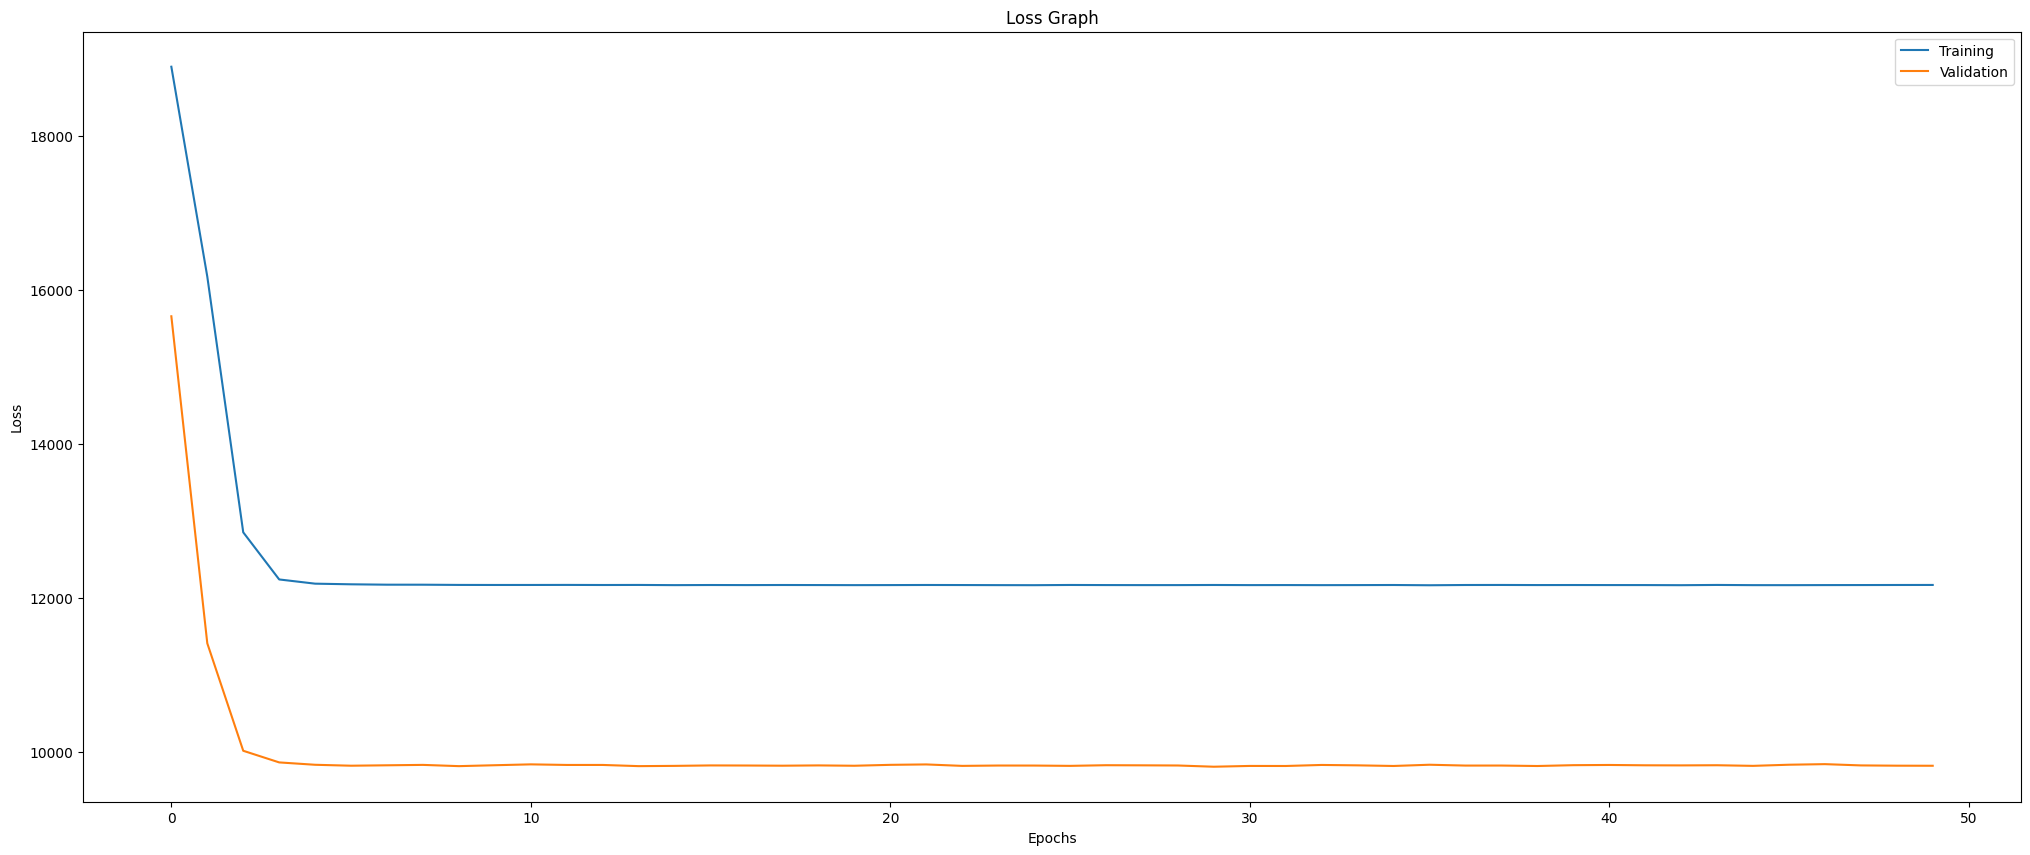

In [18]:
#plt.figure(figsize=(25,10))
#plt.plot(result.history["loss"])
#plt.plot(result.history["val_loss"])
#plt.title("Loss Graph")
#plt.ylabel("Loss")
#plt.xlabel("Epochs")
#plt.legend(["Training","Validation"],loc="upper right")
#plt.show()


In [19]:
predict=model.predict(X_test)


121/121 [==============================] - 0s 2ms/step


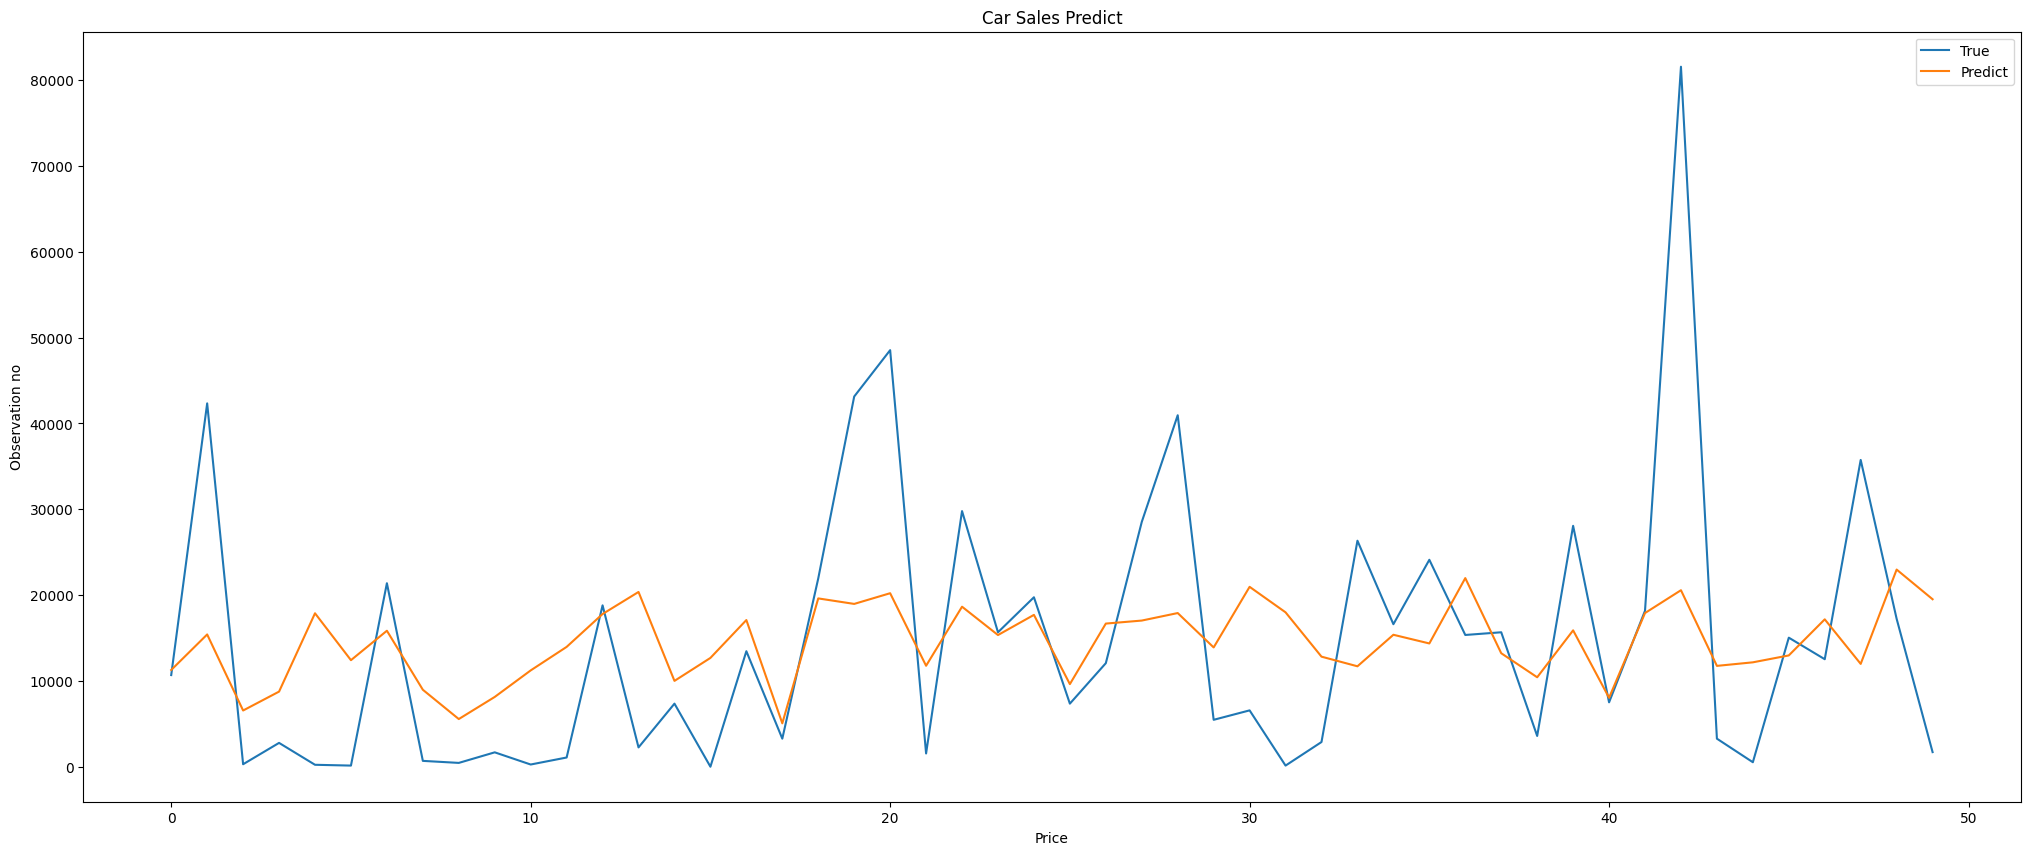

In [21]:
plt.figure(figsize=(25,10))
plt.plot(range(len(y_test[:50])),y_test[:50],label="True")
plt.plot(range(len(y_test[:50])),predict[:50],label="Predict")
plt.title("Car Sales Predict")
plt.ylabel("Observation no")
plt.xlabel("Price")
plt.legend()
plt.show()